# **NYC TLC Project Multiple Linear Regression Model**


# Build a multiple linear regression model

### Imports

In [1]:
#Standard Data Analysis libraries
import pandas as pd
import numpy as np
import datetime as dp
from matplotlib import pyplot as plt
import seaborn as sns
#Statistics & Regression libraries
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lr=LinearRegression()

In [2]:
# Read in data from NYC TLC dataset provided and load into dataframe
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = False) # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

# Display "Data loaded" once the data has been loaded

###  EDA

In [3]:
print(df0.shape)
print(df0.info())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [4]:
#convert datetime columns, create trip_duration column
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])
df0['trip_duration'] = np.subtract(df0['tpep_dropoff_datetime'], df0['tpep_pickup_datetime'])
df0.head()



,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43


Create `trip_duration`.

In [5]:
#convert trip_duration to total seconds
df0['trip_duration'] = df0['trip_duration'].dt.total_seconds()
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,844.0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1590.0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,432.0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,1815.0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,1003.0


In [6]:
#check datatypes
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
trip_duration                   float64
dtype: object

In [7]:
#sum null values for each column
df0.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_duration            0
dtype: int64

Use `.describe()`.

In [8]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,1020.826600
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,3719.788923
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-1019.000000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,399.000000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,671.000000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,1103.000000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,86373.000000


Break time of day into hours and include this as a new column

In [9]:
df0['Hour'] = df0['tpep_pickup_datetime'].dt.strftime('%H')
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,Hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,844.0,08
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1590.0,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,432.0,07
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,1815.0,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,1003.0,23


Text(0, 0.5, 'Average Trip Duration in seconds')

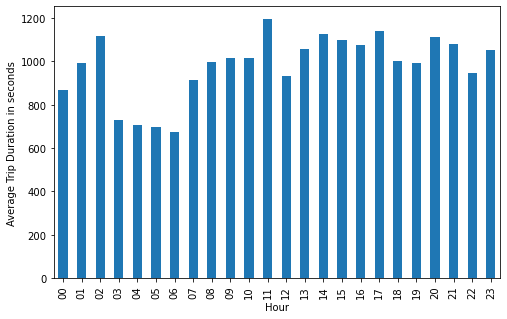

In [10]:
hour_order = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
df_hour_trip_duration = df0.groupby(['Hour']).agg({'trip_duration': 'mean'})
#plot as histogram in hour order
df_hour_trip_duration.reindex(hour_order).plot.bar(y = ['trip_duration'], figsize = (8,5), legend = False)
plt.ylabel('Average Trip Duration in seconds')

Create a pairplot to visualize pairwise relationships between relevant variables.

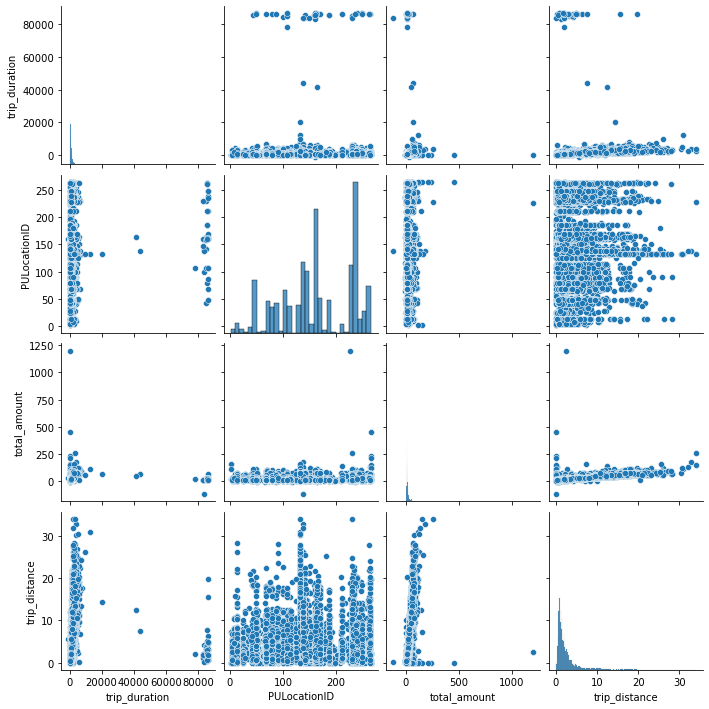

In [11]:
df_pairplot = df0[['trip_duration', 'PULocationID', 'Hour', 'total_amount', 'trip_distance']]
sns.pairplot(df_pairplot)

Outliers are hindering our ability to see relationships

Text(0.5, 1.0, '3 Variables with Outliers')

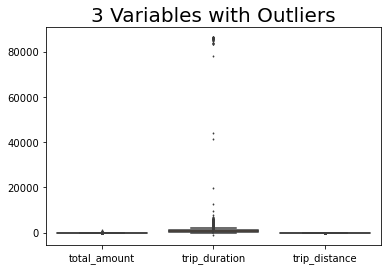

In [12]:
g = sns.boxplot(data=df0[['total_amount', 'trip_duration', 'trip_distance']], showfliers=True, fliersize = 1);
g.set_title("3 Variables with Outliers",fontsize=20)

## Address any outliers

### Trip Duration Outliers

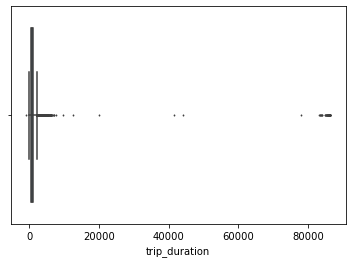

In [13]:
bp_td = sns.boxplot(df0['trip_duration'], fliersize = 1)
plt.show()

In [14]:
#Find whisker values for outlier removal
median = np.median(df0['trip_duration'])
upper_quartile = np.percentile(df0['trip_duration'], 75)
lower_quartile = np.percentile(df0['trip_duration'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = df0['trip_duration'][df0['trip_duration']<=upper_quartile+1.5*iqr].max()
lower_whisker = df0['trip_duration'][df0['trip_duration']>=lower_quartile-1.5*iqr].min()
print('Upper Whisker: ', upper_whisker)

Upper Whisker:  2158.0


Use a boxplot to visualize the distribution of the data without outliers.

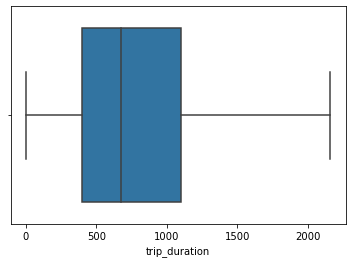

In [15]:
sns.boxplot(df0['trip_duration'], showfliers = False)
plt.show()

Remove outliers as needed.

In [16]:
df1 = df0[(df0['trip_duration'] > 0) & (df0['trip_duration'] <= 2158)]
df1.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.144500e+04,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000,21445.000000
mean,5.658283e+07,1.555747,1.639310,2.388540,1.020424,163.100676,162.175845,1.335976,11.394750,0.321730,0.497948,1.618918,0.172314,0.299580,14.309815,744.500070
std,3.280148e+07,0.496894,1.283515,2.598075,0.231885,67.212908,69.890915,0.494716,11.042082,0.386839,0.036398,2.371271,1.048854,0.015325,13.271304,465.212154
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-4.500000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-5.800000,1.000000
25%,2.816789e+07,1.000000,1.000000,0.950000,1.000000,113.000000,113.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,387.000000
50%,5.663450e+07,2.000000,1.000000,1.540000,1.000000,162.000000,162.000000,1.000000,9.000000,0.000000,0.500000,1.310000,0.000000,0.300000,11.500000,640.000000
75%,8.520621e+07,2.000000,2.000000,2.700000,1.000000,233.000000,233.000000,2.000000,13.500000,0.500000,0.500000,2.260000,0.000000,0.300000,16.560000,1007.000000
max,1.134863e+08,2.000000,6.000000,25.300000,5.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,18.260000,0.300000,1200.290000,2158.000000


In [17]:
print(df1.shape)

(21445, 20)


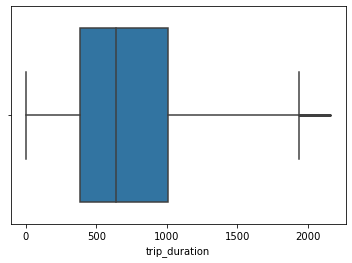

In [18]:
sns.boxplot(df1['trip_duration'], fliersize = 1)

### Total Amount Outliers

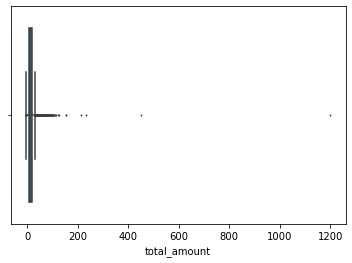

In [19]:
sns.boxplot(df1['total_amount'], fliersize = 1)

In [20]:
#Find whisker values for outlier removal
median = np.median(df1['total_amount'])
upper_quartile = np.percentile(df1['total_amount'], 75)
lower_quartile = np.percentile(df1['total_amount'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = df1['total_amount'][df1['total_amount']<=upper_quartile+1.5*iqr].max()
lower_whisker = df1['total_amount'][df1['total_amount']>=lower_quartile-1.5*iqr].min()
print('Upper Whisker: ', upper_whisker)
print('Lower Whisker: ', lower_whisker)

Upper Whisker:  28.8
Lower Whisker:  -3.8


In [21]:
df1['total_amount'].sort_values().head(20)

17602   -5.80
20698   -5.80
14714   -5.30
11204   -5.30
8204    -4.80
20317   -4.80
10281   -4.30
5448    -4.30
4423    -4.30
314     -3.80
18565   -3.80
5758    -3.80
1646    -3.30
10506    0.00
22566    0.00
5722     0.00
19067    0.30
14283    0.31
13970    1.30
16349    3.30
Name: total_amount, dtype: float64

I believe we want our model to include only trips that have a total amount greater than 0

In [22]:
#filter df1 to exclude outliers in total amount
df1 = df1[(df1['total_amount'] > 0) & (df1['total_amount'] <= 28.8)]
df1.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.007500e+04,20075.000000,20075.000000,20075.000000,20075.000000,20075.000000,20075.000000,20075.000000,20075.000000,20075.000000,20075.000000,20075.000000,20075.000000,20075.000000,20075.000000,20075.00000
mean,5.661199e+07,1.555616,1.637858,1.881566,1.003587,163.700922,163.142117,1.343611,9.785570,0.320897,0.499577,1.347617,0.009347,0.299985,12.266803,689.63203
std,3.278244e+07,0.496910,1.284080,1.389736,0.114623,67.704150,69.551266,0.494856,4.651234,0.372024,0.014544,1.322196,0.236353,0.002117,5.308414,409.51872
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,1.00000
25%,2.820816e+07,1.000000,1.000000,0.900000,1.000000,113.000000,113.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,375.00000
50%,5.667169e+07,2.000000,1.000000,1.480000,1.000000,162.000000,162.000000,1.000000,8.500000,0.000000,0.500000,1.250000,0.000000,0.300000,11.150000,609.00000
75%,8.524916e+07,2.000000,2.000000,2.400000,1.000000,234.000000,234.000000,2.000000,12.500000,0.500000,0.500000,2.150000,0.000000,0.300000,15.300000,921.00000
max,1.134863e+08,2.000000,6.000000,10.090000,5.000000,265.000000,265.000000,4.000000,28.000000,1.000000,0.500000,15.000000,10.500000,0.300000,28.800000,2154.00000


In [23]:
df1.shape

(20075, 20)

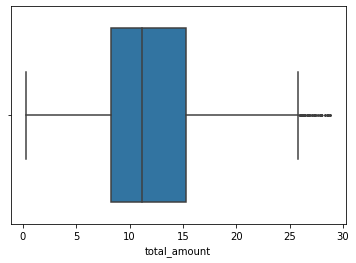

In [24]:
sns.boxplot(df1['total_amount'], fliersize = 1)

### Trip Distance Outliers

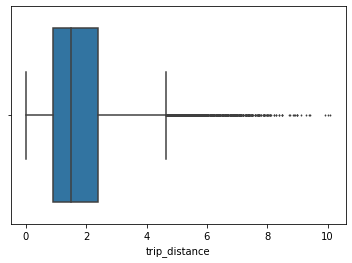

In [25]:
sns.boxplot(df1['trip_distance'], fliersize = 1)

In [26]:
#Find whisker values for outlier removal
median = np.median(df1['trip_distance'])
upper_quartile = np.percentile(df1['trip_distance'], 75)
lower_quartile = np.percentile(df1['trip_distance'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = df1['trip_distance'][df1['trip_distance']<=upper_quartile+1.5*iqr].max()
lower_whisker = df1['trip_distance'][df1['trip_distance']>=lower_quartile-1.5*iqr].min()
print('Upper Whisker: ', upper_whisker)
print('Lower Whisker: ', lower_whisker)

Upper Whisker:  4.65
Lower Whisker:  0.0


In [27]:
#filter df1 to exclude outliers in trip distance
df1 = df1[(df1['trip_distance'] > 0) & (df1['trip_distance'] <= 4.65)]
df1.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,1.883200e+04,18832.000000,18832.000000,18832.000000,18832.000000,18832.000000,18832.000000,18832.000000,18832.000000,18832.000000,18832.000000,18832.000000,18832.000000,1.883200e+04,18832.000000,18832.000000
mean,5.661742e+07,1.555969,1.636629,1.646701,1.000743,164.588891,164.381531,1.338785,9.147542,0.319483,0.499814,1.298655,0.006899,3.000000e-01,11.575985,656.802411
std,3.279500e+07,0.496871,1.283475,0.985599,0.048332,67.238029,68.724521,0.489741,3.853007,0.374538,0.009638,1.240062,0.204651,1.043637e-13,4.517190,384.219137
min,1.680300e+04,1.000000,0.000000,0.010000,1.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,0.300000,1.000000
25%,2.815847e+07,1.000000,1.000000,0.900000,1.000000,113.000000,113.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,8.160000,366.000000
50%,5.664345e+07,2.000000,1.000000,1.400000,1.000000,162.000000,162.000000,1.000000,8.500000,0.000000,0.500000,1.250000,0.000000,3.000000e-01,10.800000,582.000000
75%,8.527200e+07,2.000000,2.000000,2.200000,1.000000,234.000000,234.000000,2.000000,11.500000,0.500000,0.500000,2.060000,0.000000,3.000000e-01,14.300000,866.000000
max,1.134863e+08,2.000000,6.000000,4.650000,5.000000,265.000000,265.000000,4.000000,25.500000,1.000000,0.500000,15.000000,10.500000,3.000000e-01,28.560000,2154.000000


In [28]:
df1.shape

(18832, 20)

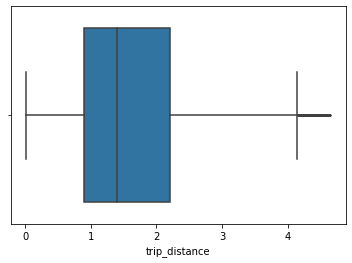

In [29]:
sns.boxplot(df1['trip_distance'], fliersize = 1)

### Identify correlations

In [30]:
#correlation matrix of columns of interest.
corr_matrix = df1[['trip_duration', 'trip_distance', 'total_amount']].corr()
print(corr_matrix)

               trip_duration  trip_distance  total_amount
trip_duration       1.000000       0.705433       0.91505
trip_distance       0.705433       1.000000       0.84052
total_amount        0.915050       0.840520       1.00000


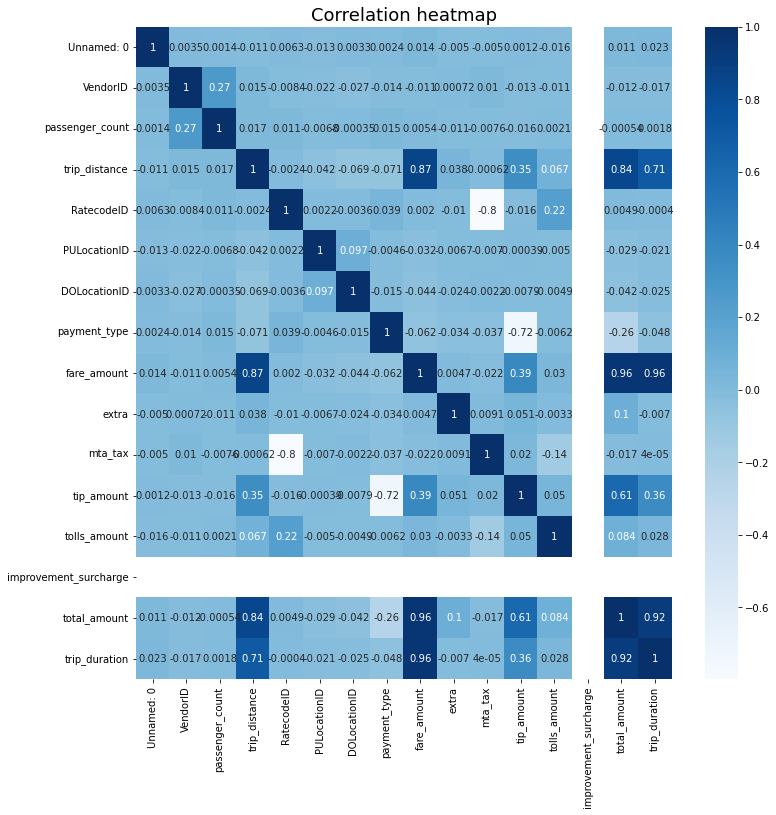

In [31]:
#create heatmap of correlation between all variables
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(method="pearson"), annot=True, cmap="Blues")
plt.title("Correlation heatmap",
          fontsize=18)
plt.show()

### Select outcome variable Y and features X

Text(0.5, 1.0, 'Filtered Trip Duration per hour')

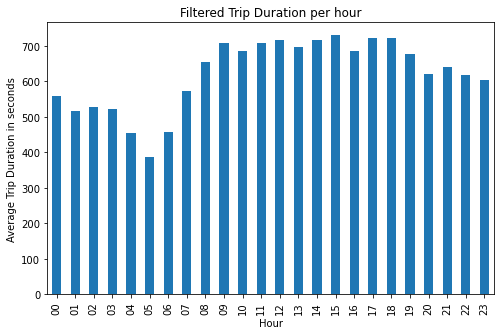

In [32]:
df_hour_trip_duration = df1.groupby(['Hour']).agg({'trip_duration': 'mean'})
#plot as histogram in hour order
df_hour_trip_duration.reindex(hour_order).plot.bar(y = ['trip_duration'], figsize = (8,5), legend = False)
plt.ylabel('Average Trip Duration in seconds')
plt.title('Filtered Trip Duration per hour')

In [33]:
# Set your Y and X variables
Y = df1[['trip_duration']]
X = df1.drop(columns = 'trip_duration')
X.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,08
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,07
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,23


### Pre-process data

Decide which columns to drop or include

In [34]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                   'store_and_fwd_flag', 'passenger_count', 'VendorID',
                   'fare_amount', 'PULocationID', 'DOLocationID', 
                  'improvement_surcharge', 'mta_tax', 'extra']
X = X.drop(columns_to_drop, axis = 1)
X = X.loc[:, ~X.columns.str.contains('Unnamed')]
X.head()

,trip_distance,RatecodeID,payment_type,tip_amount,tolls_amount,total_amount,Hour
0,3.34,1,1,2.76,0.0,16.56,08
1,1.80,1,1,4.00,0.0,20.80,14
2,1.00,1,1,1.45,0.0,8.75,07
3,3.70,1,1,6.39,0.0,27.69,13
4,4.37,1,2,0.00,0.0,17.80,23


Use `StandardScaler()` and `fit_transform()` to standardize the X variables.

In [35]:
# Standardize the X variables
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
print("X scaled:", X_scaled)

X scaled: [[ 1.71808519 -0.01538172 -0.69178155 ... -0.03371142  1.10337351
  -0.94278394]
 [ 0.15554263 -0.01538172 -0.69178155 ... -0.03371142  2.04203516
   0.03602803]
 [-0.65616779 -0.01538172 -0.69178155 ... -0.03371142 -0.62562353
  -1.10591927]
 ...
 [-1.24465785 -0.01538172  1.35016676 ... -0.03371142 -1.38939302
   0.03602803]
 [ 0.72373992 -0.01538172 -0.69178155 ... -0.03371142  0.31525194
  -0.29024263]
 [ 0.45993404 -0.01538172 -0.69178155 ... -0.03371142  0.56984178
  -0.1271073 ]]


### Build Model 1

In [36]:
#create training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, random_state = 42)


In [37]:
#build and fit model
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###  Evaluate Model 1

In [38]:
#Evaluate training data with R^2, MAE, RMSE
r_sq = lr.score(X_train, Y_train)
print("Coefficient of determination:", r_sq)
Y_pred = lr.predict(X_train)
print("R^2:", r2_score(Y_train, Y_pred))
print("MAE:", mean_absolute_error(Y_train,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_train, Y_pred)))

Coefficient of determination: 0.9541191067348346
R^2: 0.9541191067348346
MAE: 56.17847608002957
RMSE: 82.23303076199832


In [39]:
# Evaluate model performance of testing data
r_sq_test = lr.score(X_test, Y_test)
print("Coefficient of determination:", r_sq_test)
Y_pred_test = lr.predict(X_test)
print("R^2:", r2_score(Y_test, Y_pred_test))
print("MAE:", mean_absolute_error(Y_test,Y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

Coefficient of determination: 0.9568025349661279
R^2: 0.9568025349661279
MAE: 55.52298836162112
RMSE: 79.99780195943775


### Results of Model 1

In [40]:
# Create a `results` dataframe including actual, predicted, and residual columns.
results = pd.DataFrame(data = {'actual': Y_test['trip_duration'],
                                      'predicted': Y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
3097,566.0,570.709279,-4.709279
3775,1999.0,1991.346213,7.653787
502,938.0,881.497102,56.502898
18915,862.0,903.159257,-41.159257
15572,431.0,387.071727,43.928273


### Visualize model 1 results

Create a scatterplot to visualize `predicted` over `actual`.

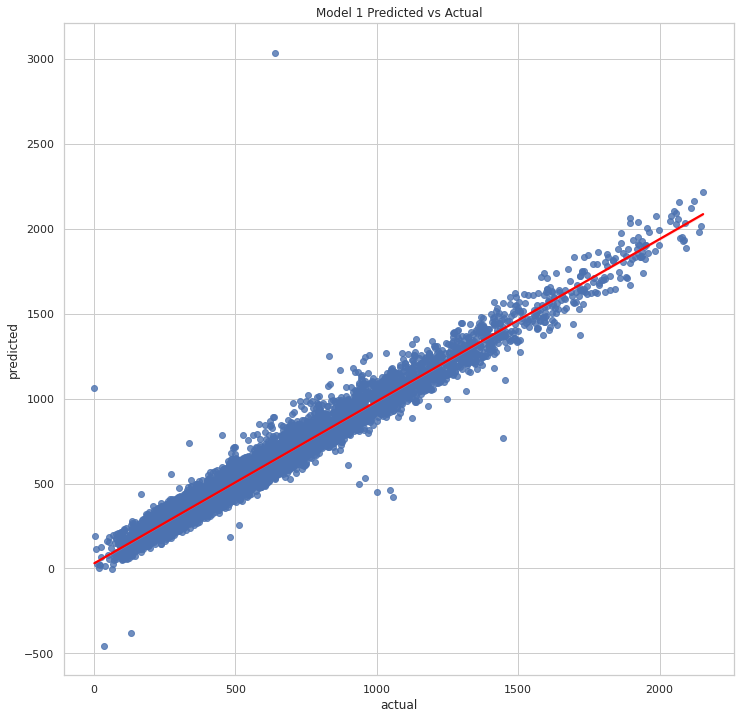

In [41]:
# Create a scatterplot to visualize `predicted` over `actual`
#set style and size
sns.set(style = 'whitegrid')
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
# set x and y values, set kws line
sns.regplot(x = 'actual',
           y = 'predicted',
           data = results, line_kws = {'color': 'red'})
plt.title('Model 1 Predicted vs Actual')
plt.show()

The model appears to work very well. There are some notable outliers to be aware of.

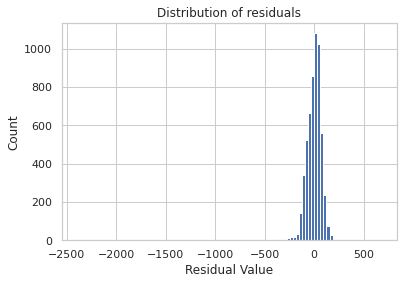

In [42]:
#visualize distribution of residuals to test for normality
plt.hist(results['residual'], bins = 100)
#labels
plt.title('Distribution of residuals')
plt.xlabel('Residual Value')
plt.ylabel('Count')
#limit view

plt.show()

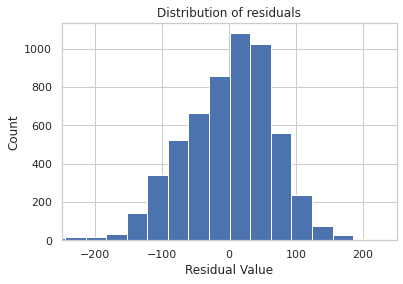

In [43]:
#visualize distribution of residuals to test for normality
plt.hist(results['residual'], bins = 100)
#labels
plt.title('Distribution of residuals')
plt.xlabel('Residual Value')
plt.ylabel('Count')
#limit view
plt.xlim(-250,250)
plt.show()

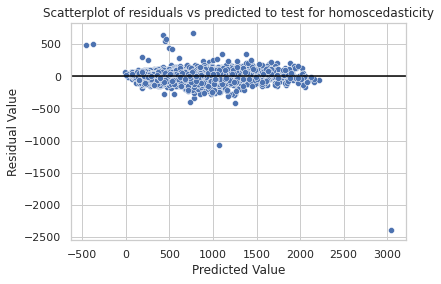

In [44]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x = 'predicted', y = 'residual', data = results)
plt.axhline(y = 0, color = 'black')
plt.title('Scatterplot of residuals vs predicted to test for homoscedasticity')
plt.xlabel('Predicted Value')
plt.ylabel('Residual Value')
plt.show()

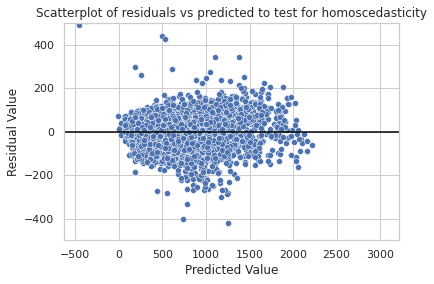

In [45]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x = 'predicted', y = 'residual', data = results)
plt.axhline(y = 0, color = 'black')
plt.title('Scatterplot of residuals vs predicted to test for homoscedasticity')
plt.xlabel('Predicted Value')
plt.ylabel('Residual Value')
#refine the view
plt.ylim(-500, 500)
plt.show()

##  Model 1 Results

The model meets assumptions for linear regression
<br>Coefficient of determination: 0.9568025349661279
<br>R^2: 0.9568025349661279
<br>MAE: 55.52298836162112
<br>RMSE: 79.99780195943775

The model may be overfit with such a High R^2 values. There are also some notable predicted value outliers. 
<br>Using Backward Elimination, removing the 'Hour' column and running the model again may give us different results.

## Model 2

Re-run the model dropping the 'Hour' Column

In [46]:
df2 = df0[(df0['trip_duration'] > 0) & (df0['trip_duration'] <= 2158)]
df2 = df2[(df2['total_amount'] > 0) & (df2['total_amount'] <= 28.8)]
df2 = df2[(df2['trip_distance'] > 0) & (df2['trip_distance'] <= 4.65)]
df2.shape

(18832, 20)

In [47]:
Y = df2[['trip_duration']]
X = df2.drop(columns = 'trip_duration')
X.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,08
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,07
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,23


In [48]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                   'store_and_fwd_flag', 'passenger_count', 'VendorID',
                   'fare_amount', 'PULocationID', 'DOLocationID', 
                  'improvement_surcharge', 'mta_tax', 'extra', 'Hour']
X = X.drop(columns_to_drop, axis = 1)
X = X.loc[:, ~X.columns.str.contains('Unnamed')]
X.head()

,trip_distance,RatecodeID,payment_type,tip_amount,tolls_amount,total_amount
0,3.34,1,1,2.76,0.0,16.56
1,1.80,1,1,4.00,0.0,20.80
2,1.00,1,1,1.45,0.0,8.75
3,3.70,1,1,6.39,0.0,27.69
4,4.37,1,2,0.00,0.0,17.80


In [49]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
print("X scaled:", X_scaled)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, random_state = 42)

X scaled: [[ 1.71808519 -0.01538172 -0.69178155  1.17847614 -0.03371142  1.10337351]
 [ 0.15554263 -0.01538172 -0.69178155  2.17845244 -0.03371142  2.04203516]
 [-0.65616779 -0.01538172 -0.69178155  0.12204957 -0.03371142 -0.62562353]
 ...
 [-1.24465785 -0.01538172  1.35016676 -1.04727756 -0.03371142 -1.38939302]
 [ 0.72373992 -0.01538172 -0.69178155  0.32365769 -0.03371142  0.31525194]
 [ 0.45993404 -0.01538172 -0.69178155  0.84783882 -0.03371142  0.56984178]]


In [50]:
lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#Evaluate training data with R^2, MAE, RMSE
r_sq = lr.score(X_train, Y_train)
print("Coefficient of determination:", r_sq)
Y_pred = lr.predict(X_train)
print("R^2:", r2_score(Y_train, Y_pred))
print("MAE:", mean_absolute_error(Y_train,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_train, Y_pred)))

Coefficient of determination: 0.9531697201145793
R^2: 0.9531697201145793
MAE: 57.616075295065166
RMSE: 83.07947456180614


In [52]:
# Evaluate model performance of testing data
r_sq_test = lr.score(X_test, Y_test)
print("Coefficient of determination:", r_sq_test)
Y_pred_test = lr.predict(X_test)
print("R^2:", r2_score(Y_test, Y_pred_test))
print("MAE:", mean_absolute_error(Y_test,Y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

Coefficient of determination: 0.9557666449930405
R^2: 0.9557666449930405
MAE: 56.86205398178035
RMSE: 80.95130679564976


In [53]:
results = pd.DataFrame(data = {'actual': Y_test['trip_duration'],
                                      'predicted': Y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
3097,566.0,582.901813,-16.901813
3775,1999.0,1993.606223,5.393777
502,938.0,874.675368,63.324632
18915,862.0,908.742750,-46.742750
15572,431.0,399.517969,31.482031


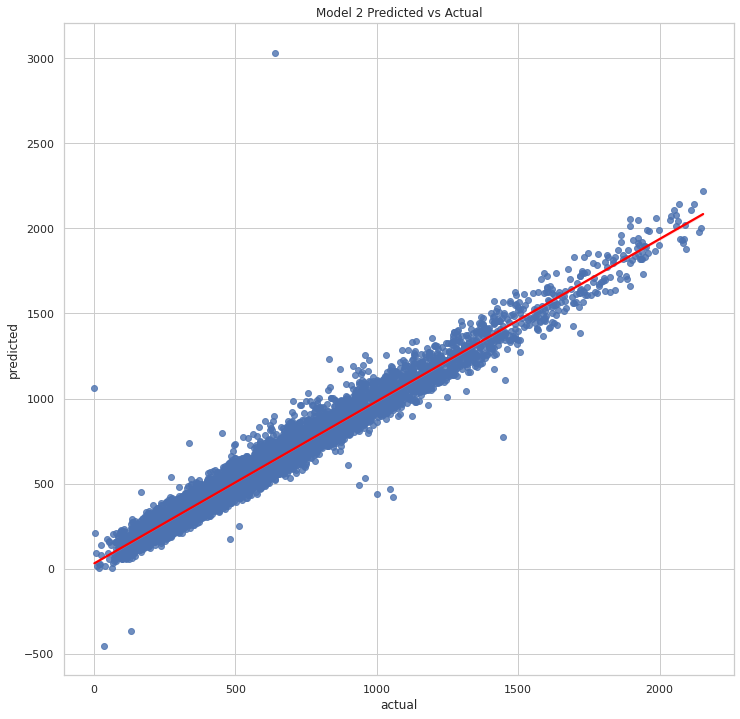

In [54]:
# Create a scatterplot to visualize `predicted` over `actual`
#set style and size
sns.set(style = 'whitegrid')
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
# set x and y values, set kws line
sns.regplot(x = 'actual',
           y = 'predicted',
           data = results, line_kws = {'color': 'red'})
plt.title('Model 2 Predicted vs Actual')
plt.show()

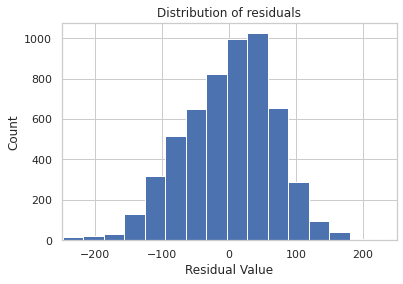

In [55]:
#visualize distribution of residuals to test for normality
plt.hist(results['residual'], bins = 100)
#labels
plt.title('Distribution of residuals')
plt.xlabel('Residual Value')
plt.ylabel('Count')
#limit view
plt.xlim(-250,250)
plt.show()

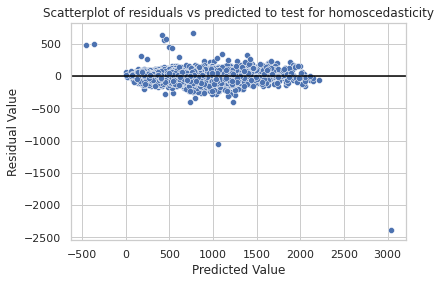

In [56]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x = 'predicted', y = 'residual', data = results)
plt.axhline(y = 0, color = 'black')
plt.title('Scatterplot of residuals vs predicted to test for homoscedasticity')
plt.xlabel('Predicted Value')
plt.ylabel('Residual Value')
plt.show()

### Model 3

Dropping the Hour column had little impact on the model. Let's try dropping total_amount and re run the model

In [57]:
df3 = df0[(df0['trip_duration'] > 0) & (df0['trip_duration'] <= 2158)]
df3 = df2[(df2['total_amount'] > 0) & (df2['total_amount'] <= 28.8)]
df3 = df2[(df2['trip_distance'] > 0) & (df2['trip_distance'] <= 4.65)]
df3.shape

(18832, 20)

In [58]:
Y = df3[['trip_duration']]
X = df3.drop(columns = 'trip_duration')
X.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,08
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,07
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,23


In [59]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                   'store_and_fwd_flag', 'passenger_count', 'VendorID',
                   'fare_amount', 'PULocationID', 'DOLocationID', 
                  'improvement_surcharge', 'mta_tax', 'extra', 'Hour', 
                  'total_amount']
X = X.drop(columns_to_drop, axis = 1)
X = X.loc[:, ~X.columns.str.contains('Unnamed')]
X.head()

,trip_distance,RatecodeID,payment_type,tip_amount,tolls_amount
0,3.34,1,1,2.76,0.0
1,1.80,1,1,4.00,0.0
2,1.00,1,1,1.45,0.0
3,3.70,1,1,6.39,0.0
4,4.37,1,2,0.00,0.0


In [60]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
print("X scaled:", X_scaled)

X scaled: [[ 1.71808519 -0.01538172 -0.69178155  1.17847614 -0.03371142]
 [ 0.15554263 -0.01538172 -0.69178155  2.17845244 -0.03371142]
 [-0.65616779 -0.01538172 -0.69178155  0.12204957 -0.03371142]
 ...
 [-1.24465785 -0.01538172  1.35016676 -1.04727756 -0.03371142]
 [ 0.72373992 -0.01538172 -0.69178155  0.32365769 -0.03371142]
 [ 0.45993404 -0.01538172 -0.69178155  0.84783882 -0.03371142]]


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, random_state = 42)

In [62]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#Evaluate training data with R^2, MAE, RMSE
r_sq = lr.score(X_train, Y_train)
print("Coefficient of determination:", r_sq)
Y_pred = lr.predict(X_train)
print("R^2:", r2_score(Y_train, Y_pred))
print("MAE:", mean_absolute_error(Y_train,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_train, Y_pred)))

Coefficient of determination: 0.5343542437416322
R^2: 0.5343542437416322
MAE: 193.18504482629342
RMSE: 261.97399870983816


In [64]:
# Evaluate model performance of testing data
r_sq_test = lr.score(X_test, Y_test)
print("Coefficient of determination:", r_sq_test)
Y_pred_test = lr.predict(X_test)
print("R^2:", r2_score(Y_test, Y_pred_test))
print("MAE:", mean_absolute_error(Y_test,Y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

Coefficient of determination: 0.5325524716914467
R^2: 0.5325524716914467
MAE: 192.17951498465362
RMSE: 263.15726090071496


In [65]:
results = pd.DataFrame(data = {'actual': Y_test['trip_duration'],
                                      'predicted': Y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
3097,566.0,487.547223,78.452777
3775,1999.0,1245.048169,753.951831
502,938.0,442.340901,495.659099
18915,862.0,763.915735,98.084265
15572,431.0,457.971081,-26.971081


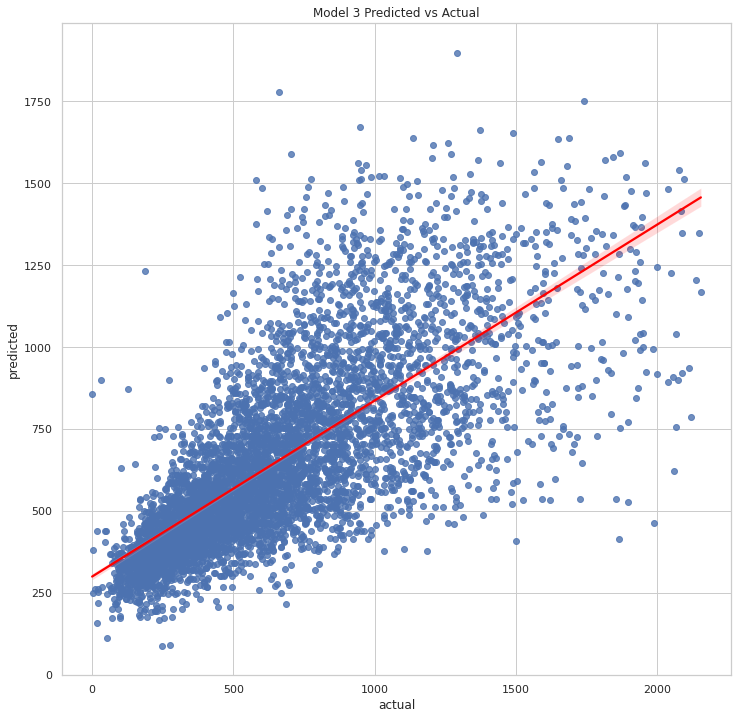

In [66]:
# Create a scatterplot to visualize `predicted` over `actual`
#set style and size
sns.set(style = 'whitegrid')
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
# set x and y values, set kws line
sns.regplot(x = 'actual',
           y = 'predicted',
           data = results, line_kws = {'color': 'red'})
plt.title('Model 3 Predicted vs Actual')
plt.show()

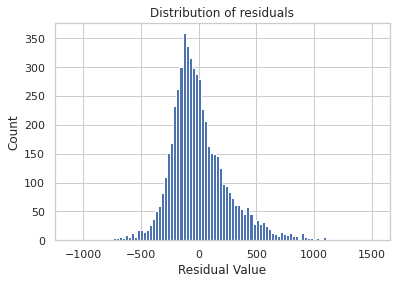

In [67]:
#visualize distribution of residuals to test for normality
plt.hist(results['residual'], bins = 100)
#labels
plt.title('Distribution of residuals')
plt.xlabel('Residual Value')
plt.ylabel('Count')
#limit view

plt.show()

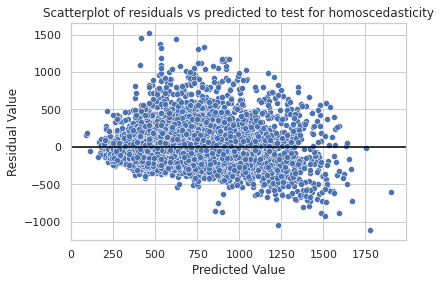

In [68]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x = 'predicted', y = 'residual', data = results)
plt.axhline(y = 0, color = 'black')
plt.title('Scatterplot of residuals vs predicted to test for homoscedasticity')
plt.xlabel('Predicted Value')
plt.ylabel('Residual Value')
plt.show()

## Conclusion

The model without total_amount doesn't produce the same extreme outliers, but has higher error, and a much lower R^2 value.
<br>Coefficient of determination: 0.5325524716914467
<br>R^2: 0.5325524716914467
<br>MAE: 192.17951498465362
<br>RMSE: 263.15726090071496

Machine Learning will help identify which columns to include in our dependent variables, that will produce the lowest variance, and bias. 
<br>Trial and error with 16 potential X variable columns would take 16^16 number of tries, or 1.8446744e+19 combinations.